In [2]:
# constant
DF_PATH = "../data/raw/winemag-data-130k-v2.csv"

### libararies

In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

### Functions

In [4]:
def part_df(data,column1,column2,most_num,num = 10):
    '''
    input :
        data : dataFrame
        column1 : String label of the column.
        column2 : String label of the column.
        name1 : first name in the new df
        name2 : second name in the new df
        num : first rows 
    output :
        data_var : new df
        var_count : df, first 10
        most_num : array, Strings
    '''
    var_count = pd.DataFrame(data.groupby(column1)[column2].count().sort_values(ascending=False) ).reset_index()
    var_count.rename(columns = {column2 : 'count'} , inplace = True)
    most = var_count.loc[0:most_num,column1].values
    data_var = data.query(column1 + ' in @most')
    return data_var,var_count.head(num),most


In [5]:
# /kaggle/input/wine-reviews/winemag-data-130k-v2.csv
data = pd.read_csv(DF_PATH , index_col = 0)
data.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


###  exploration, understanding the data

In [4]:
# first only look at US data
data_usa = data[data['country'] == 'US']
data_usa

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
12,US,"Slightly reduced, this wine offers a chalky, t...",NaN,87,34.0,California,Alexander Valley,Sonoma,Virginie Boone,@vboone,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129945,US,Hailing from one of the more popular vineyards...,Jurassic Park Vineyard Old Vines,90,20.0,California,Santa Ynez Valley,Central Coast,Matt Kettmann,@mattkettmann,Birichino 2013 Jurassic Park Vineyard Old Vine...,Chenin Blanc,Birichino
129949,US,There's no bones about the use of oak in this ...,Barrel Fermented,90,35.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Flora Springs 2013 Barrel Fermented Chardonnay...,Chardonnay,Flora Springs
129950,US,This opens with herbaceous dollops of thyme an...,Blocks 7 & 22,90,35.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Hendry 2012 Blocks 7 & 22 Zinfandel (Napa Valley),Zinfandel,Hendry
129952,US,This Zinfandel from the eastern section of Nap...,NaN,90,22.0,California,Chiles Valley,Napa,Virginie Boone,@vboone,Houdini 2011 Zinfandel (Chiles Valley),Zinfandel,Houdini


In [5]:
# our target is quality of wine ( points )
data_usa['points'].unique()

array([ 87,  86,  85,  88,  92,  91,  90,  89,  82,  96,  95,  93,  94,
        84,  83,  99,  98,  97,  81,  80, 100], dtype=int64)

In [6]:
# the affect on the target
data_usa.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 54504 entries, 2 to 129967
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                54504 non-null  object 
 1   description            54504 non-null  object 
 2   designation            36908 non-null  object 
 3   points                 54504 non-null  int64  
 4   price                  54265 non-null  float64
 5   province               54504 non-null  object 
 6   region_1               54226 non-null  object 
 7   region_2               50511 non-null  object 
 8   taster_name            37730 non-null  object 
 9   taster_twitter_handle  34741 non-null  object 
 10  title                  54504 non-null  object 
 11  variety                54504 non-null  object 
 12  winery                 54504 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 5.8+ MB


In [7]:
data_usa.isnull().sum()

country                      0
description                  0
designation              17596
points                       0
price                      239
province                     0
region_1                   278
region_2                  3993
taster_name              16774
taster_twitter_handle    19763
title                        0
variety                      0
winery                       0
dtype: int64

<AxesSubplot:xlabel='price', ylabel='points'>

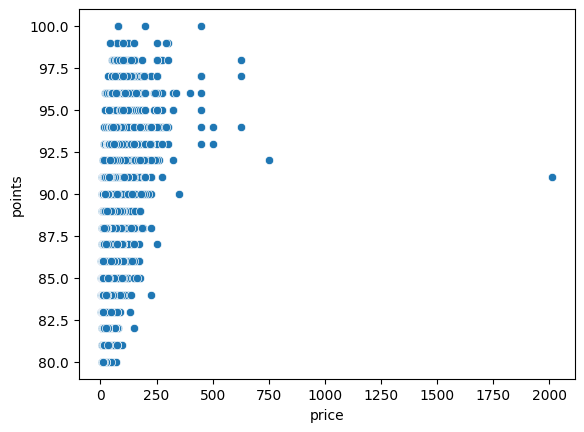

In [8]:
# may be any relation between price and points ? 
sns.scatterplot(data = data_usa , x = 'price' , y = 'points')

<AxesSubplot:xlabel='points'>

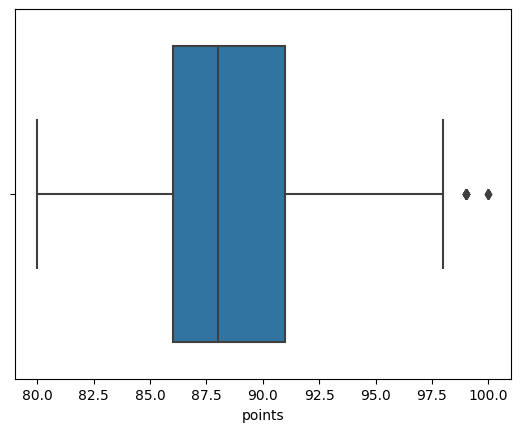

In [9]:
# what is the distribution of points ? 
sns.boxplot(data = data_usa ,x = 'points' )

<AxesSubplot:xlabel='price'>

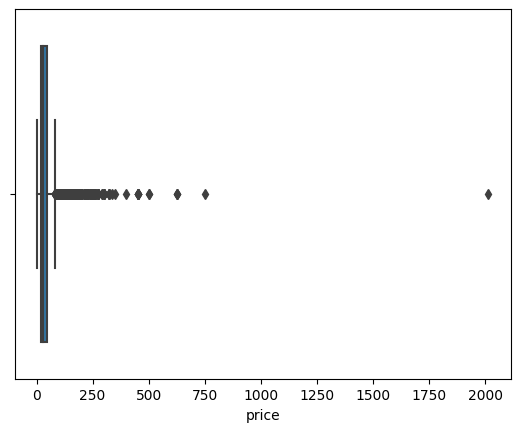

In [10]:
# what is the distribution of price ? 
sns.boxplot(data = data_usa ,x = 'price' )

In [11]:
# are we have outliers in price feature ? 
data_usa['price'].describe()

count    54265.000000
mean        36.573464
std         27.088857
min          4.000000
25%         20.000000
50%         30.000000
75%         45.000000
max       2013.000000
Name: price, dtype: float64

In [12]:
data_usa[data_usa['price'] >= 1000]['price'].count()

1

In [13]:
data_usa[data_usa['price'] >= 200]['price'].count()

140

In [14]:
data_usa[data_usa['price'] <= 6]['price'].count()

48

<AxesSubplot:xlabel='price'>

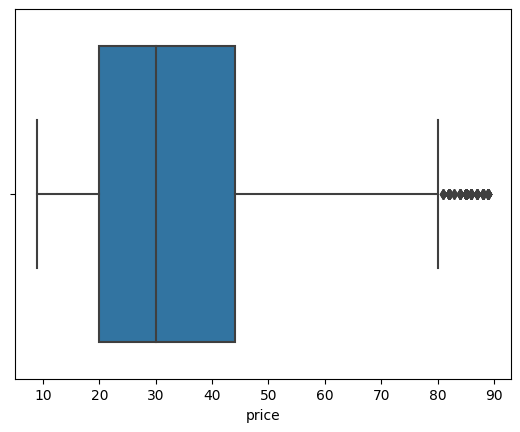

In [15]:
# drop some outlier and look at the price
sub = data_usa[(data_usa['price'] < 90) & (data_usa['price'] > 8 )]
sns.boxplot(data = sub , x = 'price')

<AxesSubplot:xlabel='price', ylabel='points'>

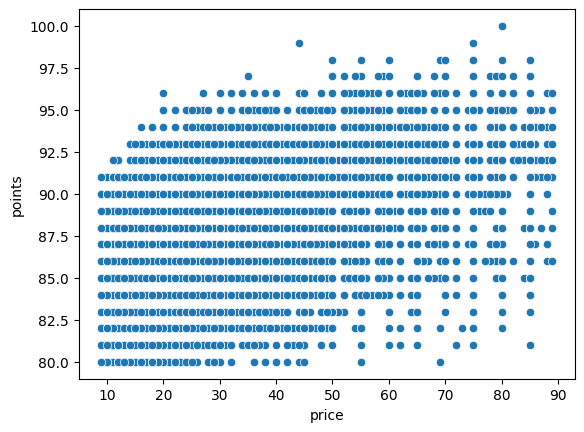

In [16]:
# scatter plot to this subset
sns.scatterplot(data = sub , x = 'price' , y = 'points')

In [17]:
# may points and price differ from variety kind to another  ? 
data_usa['variety'].nunique()

257

In [18]:
def part_df(data,column1,column2,most_num,num = 10):
    '''
    input :
        data : dataFrame
        column1 : String label of the column.
        column2 : String label of the column.
        name1 : first name in the new df
        name2 : second name in the new df
        num : first rows 
    output :
        data_var : new df
        var_count : df, first 10
        most_num : array, Strings
    '''
    var_count = pd.DataFrame(data.groupby(column1)[column2].count().sort_values(ascending=False) ).reset_index()
    var_count.rename(columns = {column2 : 'count'} , inplace = True)
    most = var_count.loc[0:most_num,column1].values
    data_var = data.query(column1 + ' in @most')
    return data_var,var_count.head(num),most


<AxesSubplot:xlabel='points', ylabel='variety'>

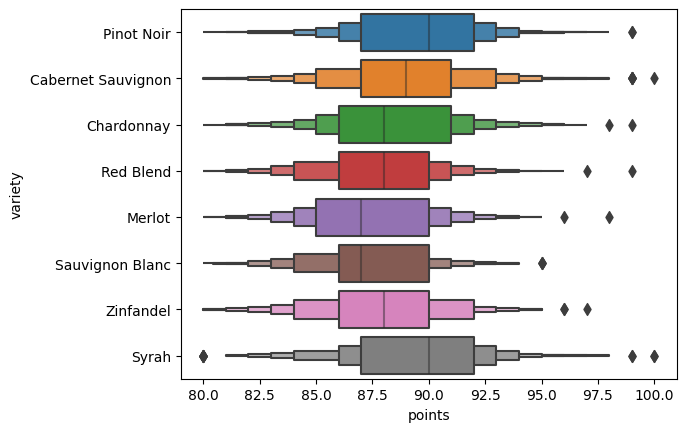

In [19]:
data_var , _ , most_var = part_df(data_usa , 'variety','points',7)
sns.boxenplot(data = data_var , x = 'points' , y = 'variety')

[Text(0.5, 1.0, 'price with the outliers ')]

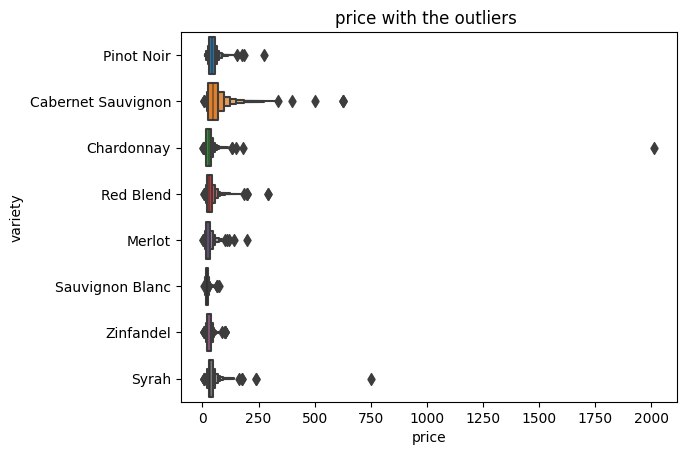

In [20]:
# sns.boxenplot(data = no_outlier , x = 'price' , y = 'variety')
data_pv , _ , most_pv = part_df(data_usa , 'variety','price',7)
sns.boxenplot(data = data_pv , x = 'price' , y = 'variety').set(title='price with the outliers ')


[Text(0.5, 1.0, 'price without the outliers ')]

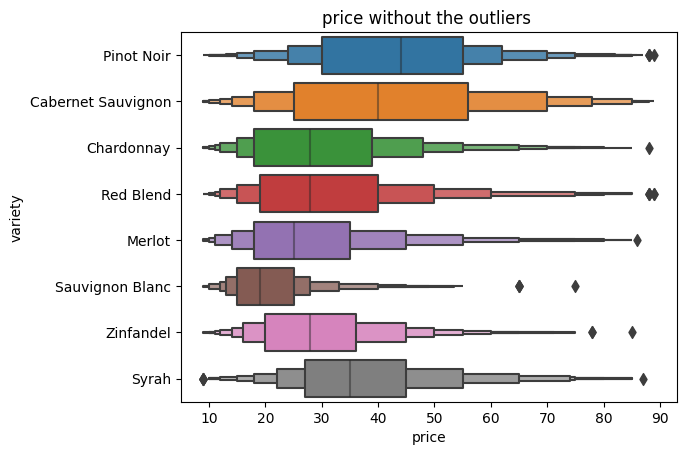

In [21]:
# what about price with variety 
# using sub dataframe
no_outlier = sub.query('variety in @most_pv')
sns.boxenplot(data = no_outlier , x = 'price' , y = 'variety').set(title='price without the outliers ')

In [22]:
data_usa.nunique()

country                      1
description              50449
designation              14183
points                      21
price                      160
province                    27
region_1                   264
region_2                    17
taster_name                 15
taster_twitter_handle       12
title                    50229
variety                    257
winery                    5375
dtype: int64

In [23]:
data_pro , pro , most_pro = part_df(data_usa , 'province','points',7,5)


<AxesSubplot:xlabel='count', ylabel='province'>

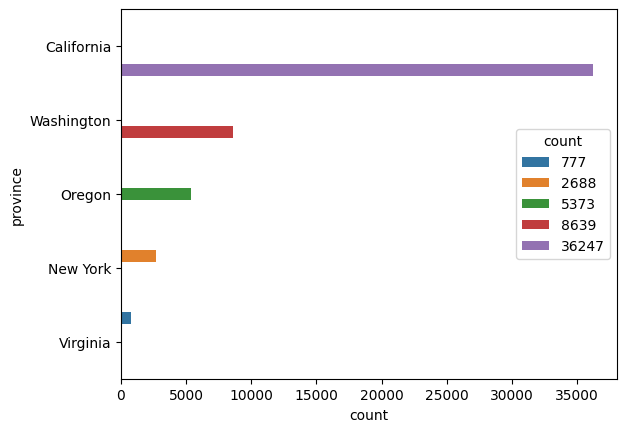

In [24]:
# which province was get the most reviews, any impact in the target ?
sns.barplot(pro , x = 'count' , y = 'province' , hue = 'count')



<AxesSubplot:xlabel='points', ylabel='province'>

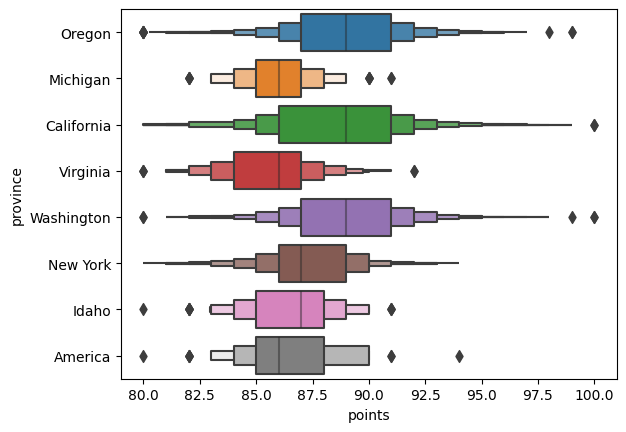

In [25]:
sns.boxenplot(data = data_pro , x = 'points' , y = 'province')

<AxesSubplot:xlabel='count', ylabel='region_1'>

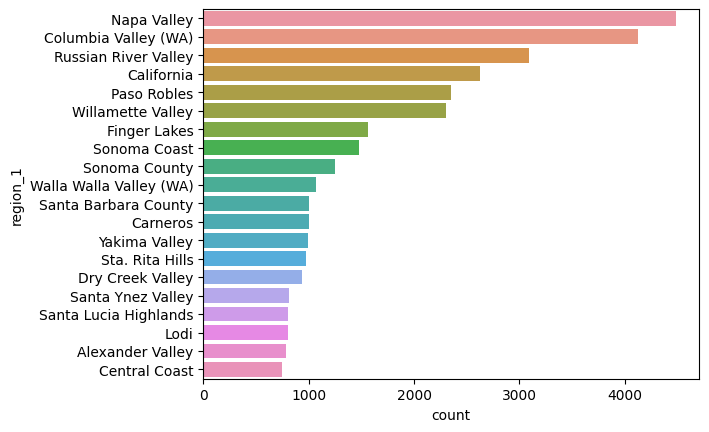

In [26]:
# region_1
data_reg , reg , most_reg = part_df(data_usa , 'region_1','points',10,20)
sns.barplot(reg , x = 'count' , y = 'region_1')


<AxesSubplot:xlabel='points', ylabel='region_1'>

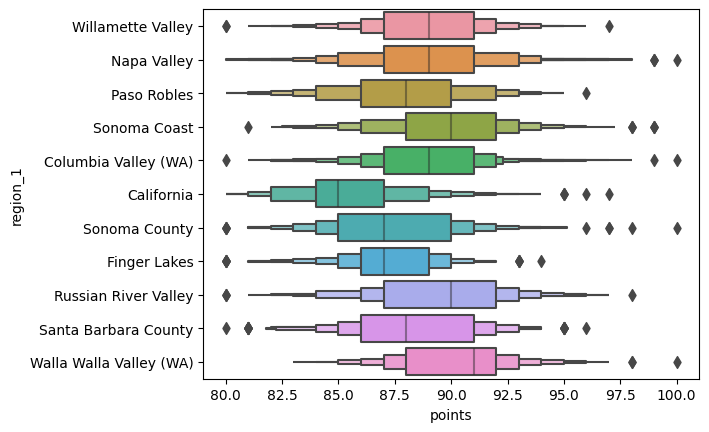

In [27]:
sns.boxenplot(data = data_reg , x = 'points' , y = 'region_1')

In [28]:
# designation
data_usa['designation'].nunique()

14183

In [29]:
data_usa['designation'].sample(2)

46263                         NaN
112251    Jerusalem Hill Vineyard
Name: designation, dtype: object

In [30]:
# size of nulls 
print('the proportion of nulls = ',data_usa['designation'].isnull().sum() / data_usa.shape[0]) 

the proportion of nulls =  0.32283869073829446


In [31]:
data_des , des , most_des = part_df(data_usa , 'designation','points',10,20)

<AxesSubplot:xlabel='count', ylabel='designation'>

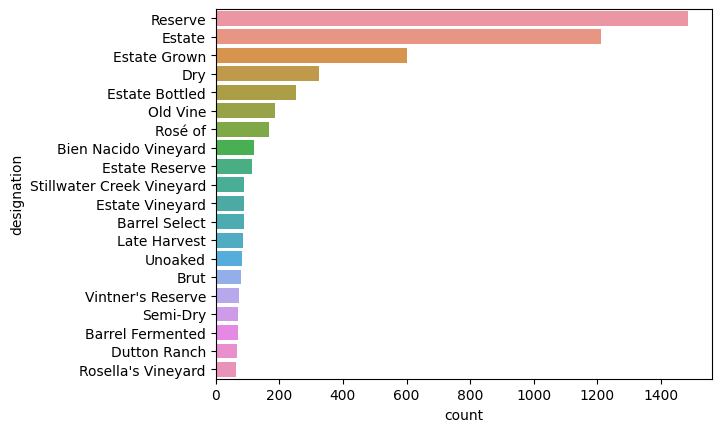

In [32]:
sns.barplot(data = des , x = 'count',y = 'designation')

<AxesSubplot:xlabel='points', ylabel='designation'>

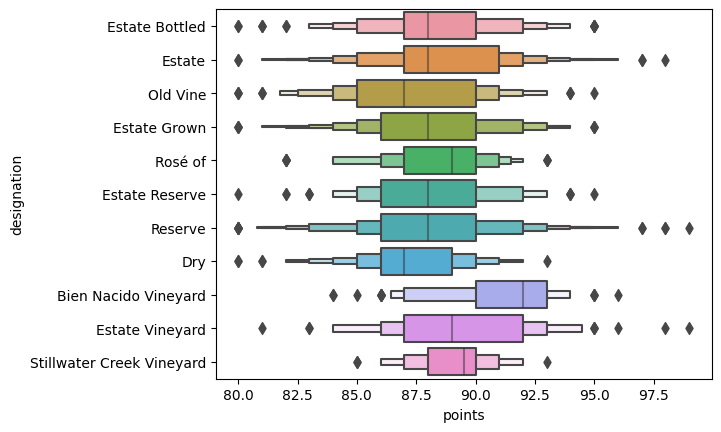

In [33]:
sns.boxenplot(data = data_des , x = 'points' , y = 'designation')

> text data we will treat with it later, ISA.

 > i think now we are *familiar* with the dataset .<br>
 > i think without invest in the text features will not reach to any thing, we have not any visualized pattern.